In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


In [29]:
#prepare dataset
#pipeline
#model design (input, output size, forward pass)
#loss and optimizer
#training
# 1) forward pass (prediction)
# 2) gradient calculation (backward pass in pytorch partial derivative wrt to model parameters such weights)
# 3) weight updation

x_numpy, y_numpy = datasets.make_regression(n_samples=50, n_features=1, noise=20, random_state=2)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape


In [30]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size) #declare any model in that way

In [31]:
#loss and optimizer

criterion = nn.MSELoss()
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #we can add other parameters such as momentum etc

In [32]:
#training loop

iter = 100

for epoch in range (iter):
  y_pred = model(x)
  #loss
  loss = criterion(y_pred, y)
  #gradient calculations
  loss.backward()

  #optimizer
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) %10 == 0:
    print(f'epoch {epoch+1}, loss = {loss.item():.3f}')


epoch 10, loss = 1484.024
epoch 20, loss = 1116.999
epoch 30, loss = 885.670
epoch 40, loss = 739.510
epoch 50, loss = 646.919
epoch 60, loss = 588.099
epoch 70, loss = 550.623
epoch 80, loss = 526.671
epoch 90, loss = 511.312
epoch 100, loss = 501.430


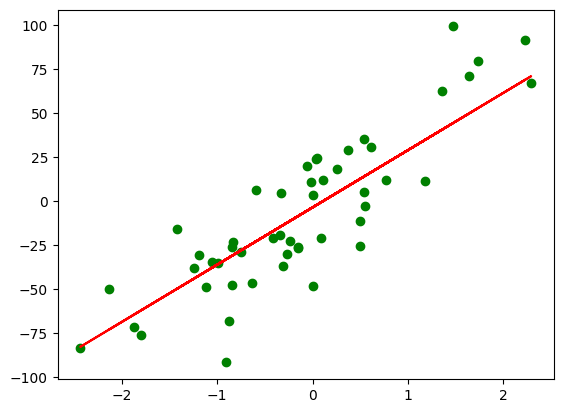

In [40]:
#plot
predicted = model(x).detach().numpy() #we are using detach to create a new tensor that does not contain gradients
plt.plot(x_numpy, y_numpy, 'go')
plt.plot(x_numpy, predicted, 'r')
plt.show()